<a href="https://colab.research.google.com/github/jgesc-05/proy_inteligencia_artificial/blob/main/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Predicción Calidad del Aire*

#1. Importación del dataset desde Kaggle



*   Con Kagglehub, se importa el dataset desde Kaggle.


*   Importación de librerías necesarias para EDA.





In [1]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Download latest version
path = kagglehub.dataset_download("pranavraizada/pune-air-quality-index-dataset")

print("Path to dataset files:", path)

100%|██████████| 104k/104k [00:00<00:00, 439kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pranavraizada/pune-air-quality-index-dataset/versions/2


#2. Creación del dataframe Pandas

Se transforma desde un dataset a un dataframe, el cual se puede trabajar con pandas, para utilizar las funcionalidades que ofrece Python.

In [2]:
df = pd.read_csv(path + "/2024_hourly_data.csv")

#Verificación del dataframe
df

,Date,Time,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
0,2023-12-31,01:00:00,59.0,6.0,34.0,0.0,191.0,211.0,3.0
1,2023-12-31,02:00:00,62.0,6.0,33.0,1.0,185.0,225.0,4.0
2,2023-12-31,03:00:00,50.0,6.0,30.0,0.0,182.0,240.0,3.0
3,2023-12-31,04:00:00,52.0,5.0,27.0,0.0,176.0,247.0,3.0
4,2023-12-31,05:00:00,46.0,4.0,23.0,NaN,176.0,249.0,2.0
...,...,...,...,...,...,...,...,...,...
8005,2024-12-30,20:00:00,26.0,3.0,32.0,4.0,48.0,49.0,0.0
8006,2024-12-30,21:00:00,36.0,3.0,36.0,0.0,51.0,43.0,1.0
8007,2024-12-30,22:00:00,54.0,3.0,35.0,0.0,63.0,41.0,2.0
8008,2024-12-30,23:00:00,66.0,3.0,31.0,0.0,70.0,42.0,6.0


#3. Verificación de nulos en el dataset

En primer lugar, se verifican nulos, para saber el estado de nulos de cada feature en el dataframe, al que llamamos "df".

In [3]:
#Con el método isnull().sum()
df.isnull().sum()

,0
Date,0
Time,0
CO,66
NH3,223
NO2,287
OZONE,890
PM10,262
PM2.5,314
SO2,278


#4. Verificación de los tipos de datos:



*   Se verifica qué tipo de datos hay (enteros, flotantes, objetos) y qué tipo de dato tiene cada label del dataset.

*   En este caso, todos son flotantes, a excepción del día y hora (Date y Time, respectivamente).



In [4]:
df.dtypes

,0
Date,object
Time,object
CO,float64
NH3,float64
NO2,float64
OZONE,float64
PM10,float64
PM2.5,float64
SO2,float64


#5. Descripción estadística del dataframe:

*   Se consultan los datos más importantes de la distribución (de cada feature): conteo (cantidad de valores del feature), media, desviación estándar, mínimo,primer cuartil (25%), segundo cuartil (50%, mediana), tercer cuartil (75%) y máximo.

*  Esto se realiza por medio del método describe() de Pandas.

In [5]:
print("Descripción del dataframe:\n")
print(df.describe())

Descripción del dataframe:

                CO          NH3          NO2        OZONE         PM10  \
count  7944.000000  7787.000000  7723.000000  7120.000000  7748.000000   
mean     31.273288     3.198536    25.555225    49.574860    84.449923   
std      25.697814     2.644369    20.516553    60.217828    46.106604   
min       1.000000     0.000000     0.000000     0.000000     5.000000   
25%      14.000000     2.000000    14.000000     8.000000    47.000000   
50%      21.000000     3.000000    21.000000    24.000000    80.000000   
75%      39.000000     4.000000    31.000000    70.000000   115.000000   
max     152.000000    46.000000   230.000000   308.000000   500.000000   

             PM2.5          SO2  
count  7696.000000  7732.000000  
mean     75.946985     6.274573  
std      66.487520     5.124805  
min       2.000000     0.000000  
25%      28.000000     3.000000  
50%      57.000000     5.000000  
75%      94.000000     8.000000  
max     500.000000   137.000000  

* Como se puede observar, los features de valor flotante (decimales) poseen, en su mayoría, una gran desviación estándar, lo que indica una gran dispersión de los datos; por ejemplo, el monóxido de carbono (CO) tiene una media de, aproximadamente, 31.3, y una desviación estándar de, aproximadamente, 25.7; considereablemente alta. Esto debido a que su valor máximo es 152, mientras que el mínimo es 1.

* Para conocer si este valor de desviación estándar es alto para la distribución de datos se utilizó el coeficiente de variación, útil para calcular la variabilidad de los datos de una forma adimensional.

* Su fórmula es: $CV = \frac{mean}{std} \times 100$

* En el caso del CO, este fue aproximadamente 0.8 (80%), una variación muy alta.


In [6]:
df.describe(include="object")

,Date,Time
count,8010,8010
unique,351,24
top,2024-07-07,03:00:00
freq,24,338


In [7]:
timeCount =df.Time.value_counts()
total=timeCount.values.sum()


**Se usa una variable "timeCount" para saber la cantidad de horas registradas; es posible observar que están distribuidas muy equitativamente**



<Axes: ylabel='count'>

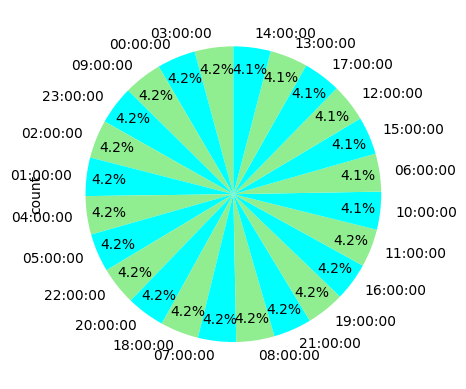

In [8]:
from enum import auto
timeCount.plot(kind="pie", autopct="%1.1f%%", colors=["lightgreen", "aqua"], startangle=90, pctdistance=0.85)  # Ajusta el valor de pctdistance

Para mostrar el gráfico de pastel, se utilizó el método plot() de Pandas.

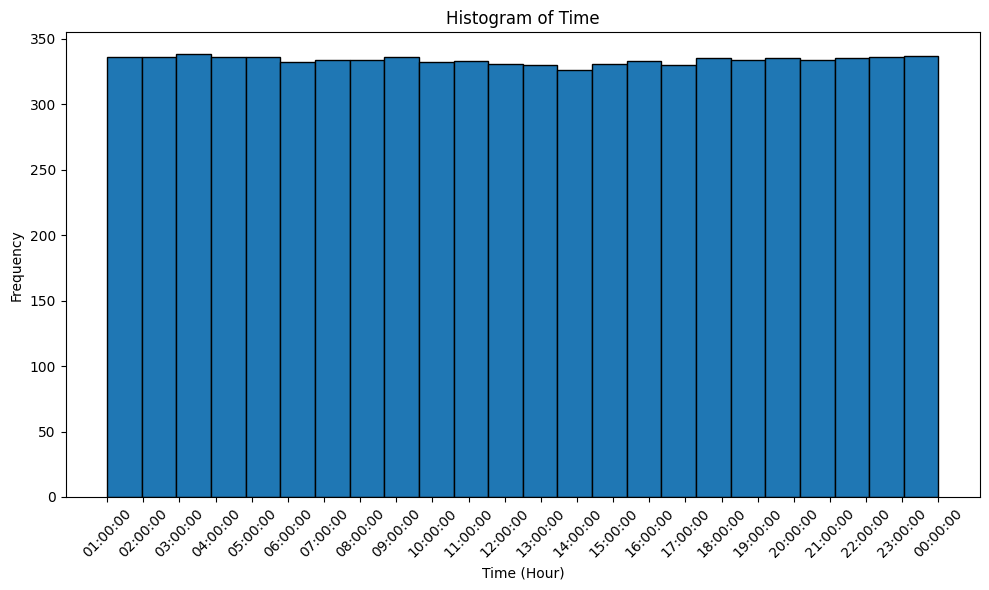

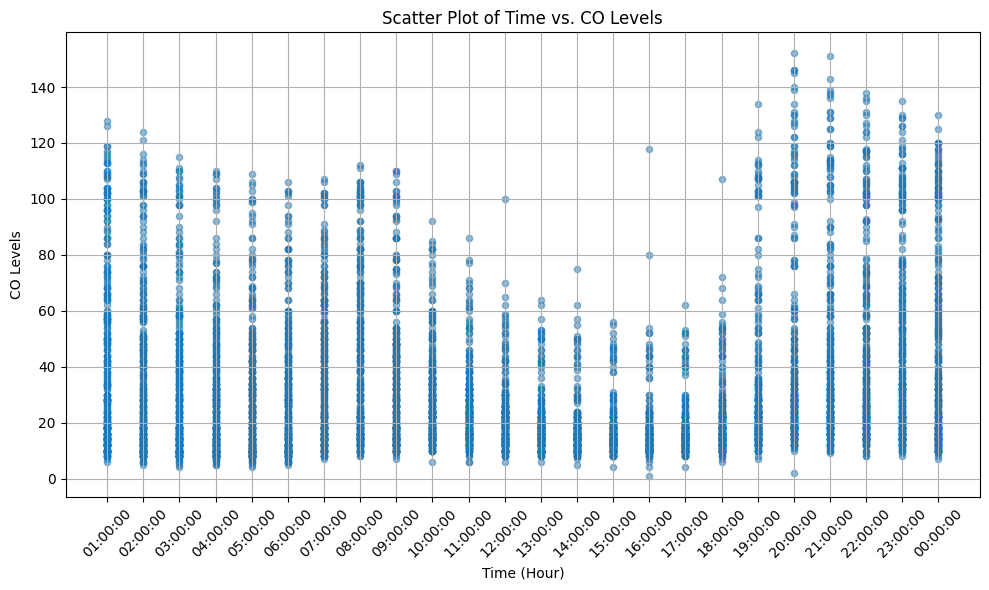

In [9]:
# Histograma
plt.figure(figsize=(10, 6))
plt.hist(df['Time'], bins=24, edgecolor='black')
plt.xlabel('Time (Hour)')
plt.ylabel('Frequency')
plt.title('Histogram of Time')
plt.xticks(rotation=45)  # Rotar etiquetas
plt.tight_layout()  # Ajustar espacio
plt.show()

# Gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['CO'], alpha=0.5, s=20)  # Reducir tamaño y opacidad
plt.xlabel('Time (Hour)')
plt.ylabel('CO Levels')
plt.title('Scatter Plot of Time vs. CO Levels')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Como se aprecia, la correlación entre niveles de gas y la hora no se puede determinar fácilmente por un medio visual como una gráfica; debido a esto, será necesaria la utilización de una herramienta matemática como el cálculo del coeficiente de Pearson.

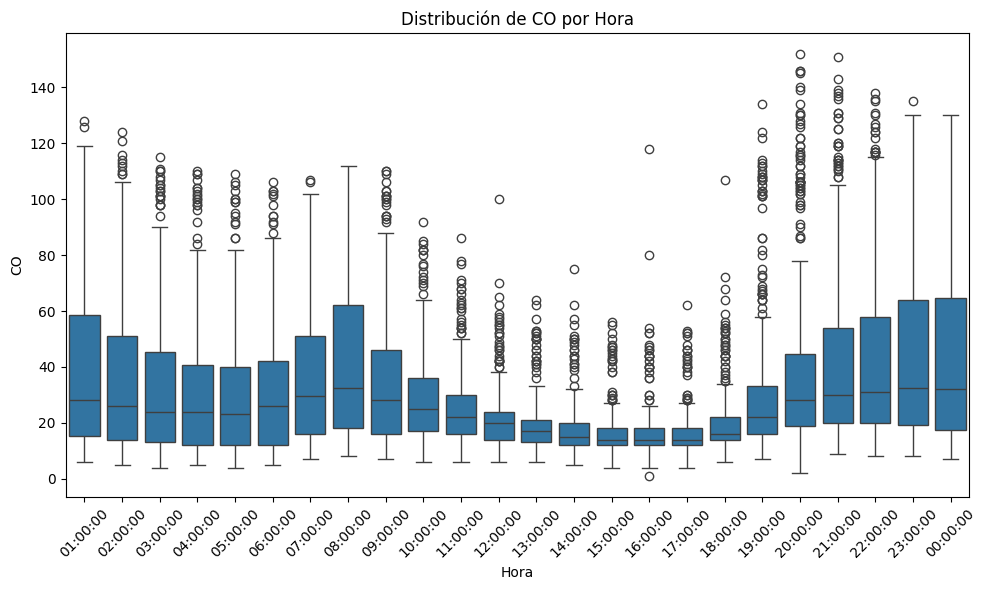

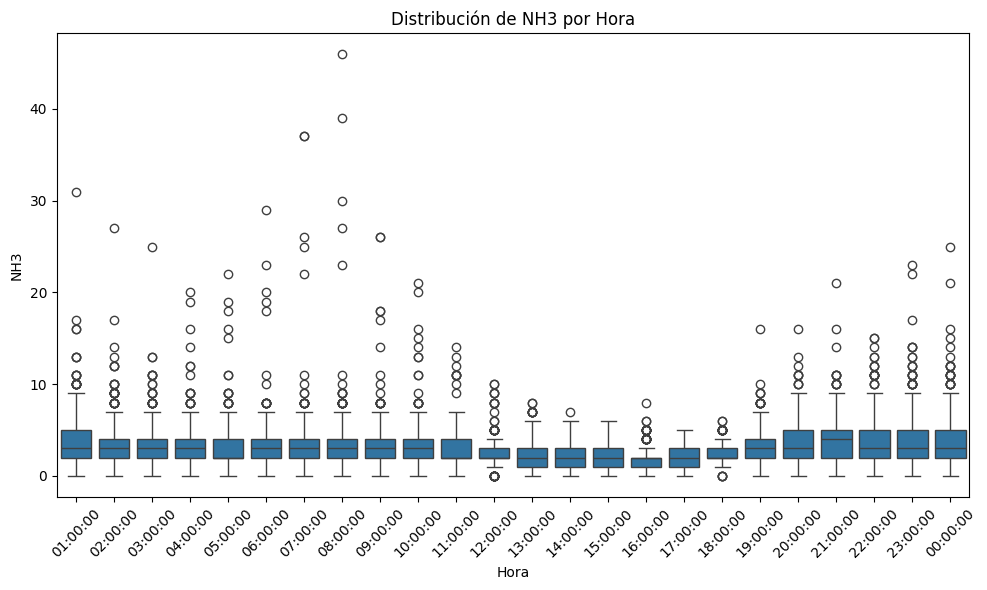

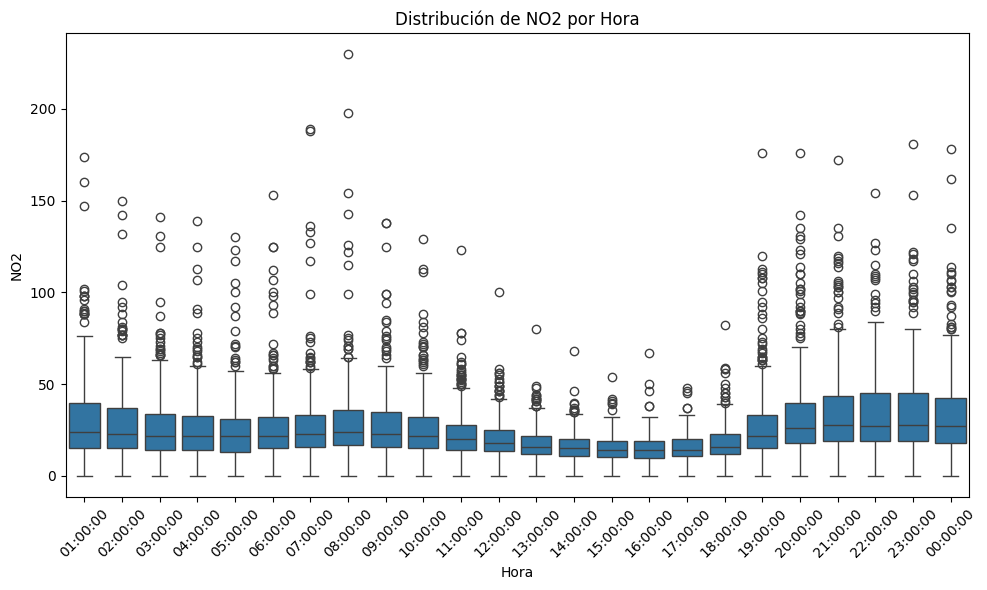

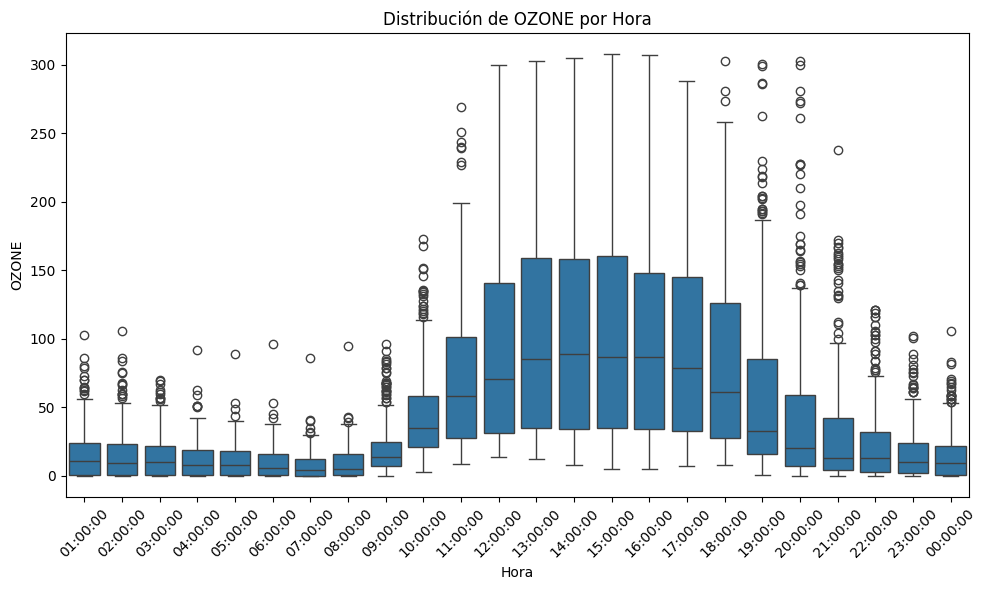

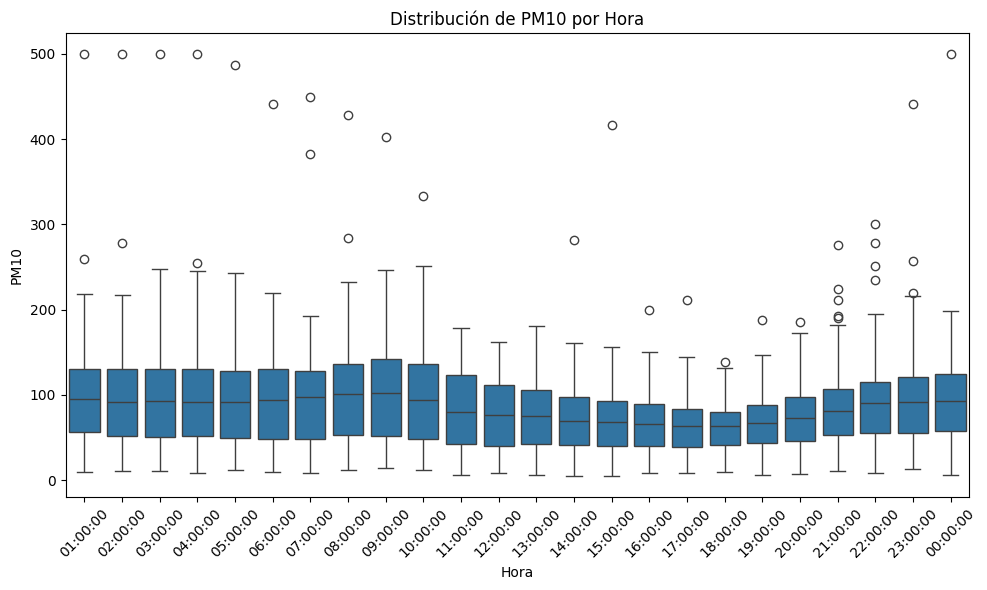

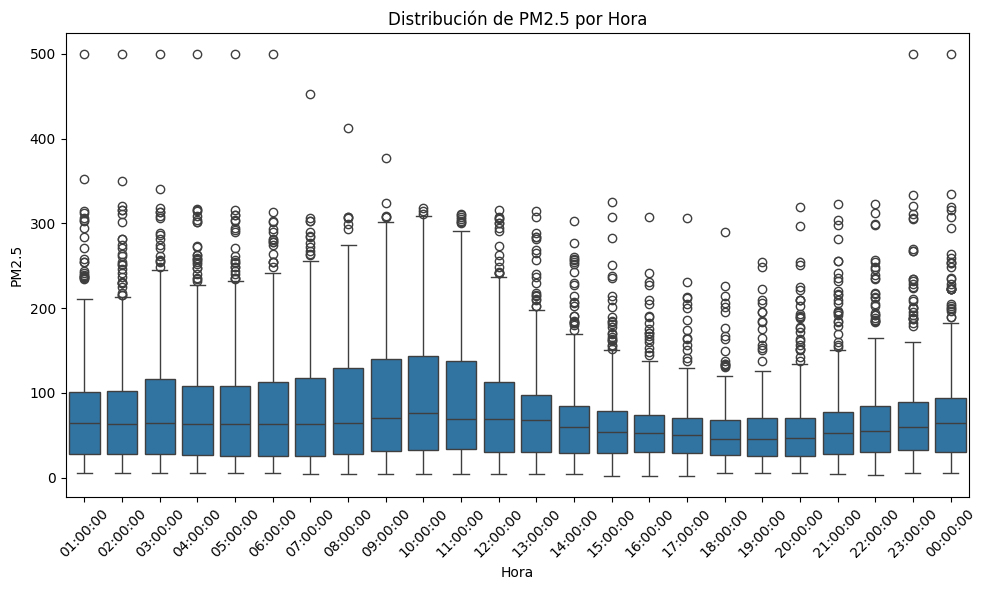

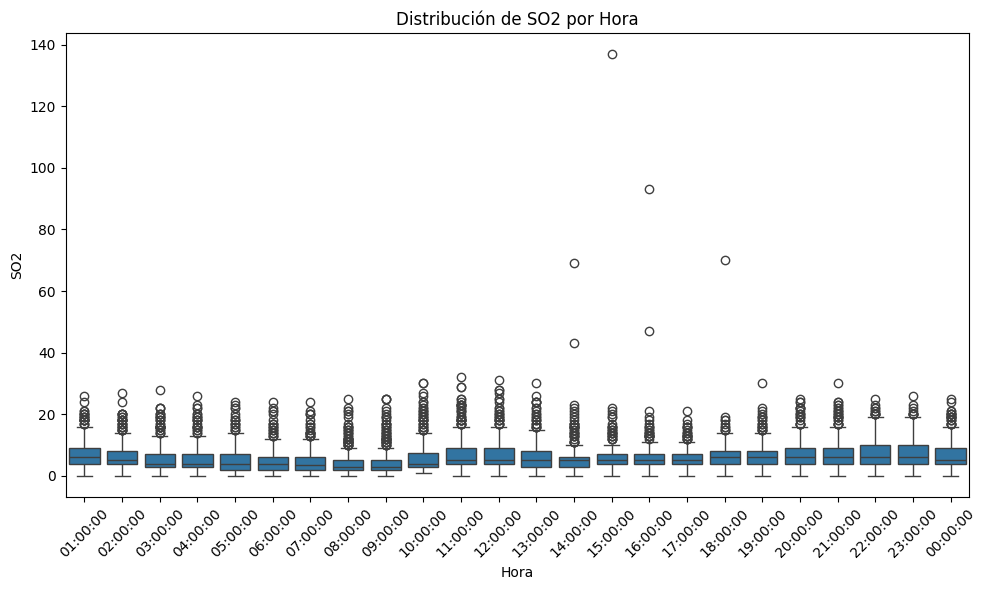

In [10]:

# Lista de gases a graficar
gases = ["CO",
"NH3",
"NO2",
"OZONE",
"PM10",
"PM2.5",
"SO2"]

# Crear las gráficas para cada gas
for gas in gases:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Time", y=gas, data=df)
    plt.title(f"Distribución de {gas} por Hora")
    plt.xlabel("Hora")
    plt.ylabel(gas)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Como se puede observar, en su mayoría, hay demasiados datos anómalos (outliers), en algunos casos extremadamente altos; pueden estar ocasionados por un error de los sensores.


#6. Búsqueda de valores únicos y no únicos (unique y nunique)

* Al tratarse de un dataframe con variables continuas (es decir, puede contener todos los valores de la recta numérica), existe una gran cantidad de valores únicos (obtenidos con un ciclo for para cada columna (feature)), los cuales se consiguen por medio de los métodos unique y nunique de pandas; estos dan los valores únicos en cada columna y el número de valores únicos en cada columna, respectivamente.


In [11]:
for column in df.columns:
       unique_values = df[column].unique()
       print(f"Valores únicos en la columna '{column}':")
       print(unique_values)

Valores únicos en la columna 'Date':
['2023-12-31' '2024-01-01' '2024-01-02' '2024-01-03' '2024-01-04'
 '2024-01-05' '2024-01-06' '2024-01-07' '2024-01-08' '2024-01-09'
 '2024-01-10' '2024-01-11' '2024-01-12' '2024-01-13' '2024-01-16'
 '2024-01-17' '2024-01-18' '2024-01-19' '2024-01-20' '2024-01-21'
 '2024-01-22' '2024-01-23' '2024-01-24' '2024-01-25' '2024-01-26'
 '2024-01-27' '2024-01-28' '2024-01-29' '2024-01-30' '2024-01-31'
 '2024-02-01' '2024-02-02' '2024-02-03' '2024-02-04' '2024-02-05'
 '2024-02-06' '2024-02-07' '2024-02-08' '2024-02-09' '2024-02-10'
 '2024-02-11' '2024-02-12' '2024-02-13' '2024-02-14' '2024-02-15'
 '2024-02-16' '2024-02-17' '2024-02-18' '2024-02-19' '2024-02-20'
 '2024-02-21' '2024-02-22' '2024-02-23' '2024-02-24' '2024-02-25'
 '2024-02-26' '2024-02-27' '2024-02-28' '2024-02-29' '2024-03-01'
 '2024-03-02' '2024-03-03' '2024-03-04' '2024-03-05' '2024-03-06'
 '2024-03-07' '2024-03-08' '2024-03-09' '2024-03-10' '2024-03-11'
 '2024-03-12' '2024-03-13' '2024-03-14'

In [12]:
for column in df.columns:
       num_unique_values = df[column].nunique()
       print(f"Cantidad de valores únicos en la columna '{column}': {num_unique_values}")

Cantidad de valores únicos en la columna 'Date': 351
Cantidad de valores únicos en la columna 'Time': 24
Cantidad de valores únicos en la columna 'CO': 141
Cantidad de valores únicos en la columna 'NH3': 33
Cantidad de valores únicos en la columna 'NO2': 154
Cantidad de valores únicos en la columna 'OZONE': 282
Cantidad de valores únicos en la columna 'PM10': 234
Cantidad de valores únicos en la columna 'PM2.5': 324
Cantidad de valores únicos en la columna 'SO2': 39


Como es posible observar, comprobando con el método info() de pandas, todos los features, a excepción de la fecha y hora (Date y Time, respectivamente), tienen valores nulos.

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8010 non-null   object 
 1   Time    8010 non-null   object 
 2   CO      7944 non-null   float64
 3   NH3     7787 non-null   float64
 4   NO2     7723 non-null   float64
 5   OZONE   7120 non-null   float64
 6   PM10    7748 non-null   float64
 7   PM2.5   7696 non-null   float64
 8   SO2     7732 non-null   float64
dtypes: float64(7), object(2)
memory usage: 563.3+ KB
None


**Aquí se crea una matriz de correlación, representada con un mapa de calor con Seaborn (sns).**

* Método heatmap()

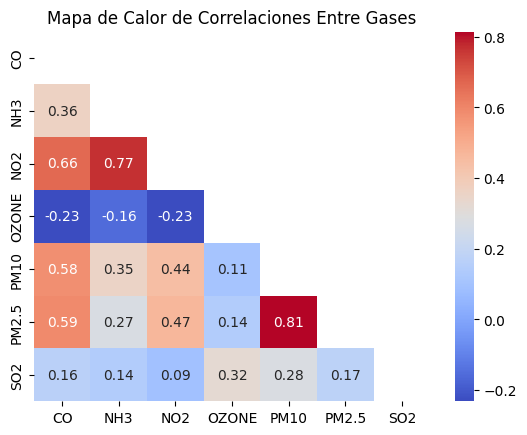

In [14]:
variables_numericas = df.select_dtypes(include=["int", "float"])

# Calcular la matriz de correlación
correlaciones = variables_numericas.corr()
# Create a mask to hide the lower triangle of the matrix
mask = np.triu(np.ones_like(correlaciones, dtype=bool))

# Crear el mapa de calor
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)

# Añadir título al gráfico
plt.title("Mapa de Calor de Correlaciones Entre Gases")
plt.show()

* Tal como se puede observar, hay una correlación considerablemente alta entre el PM10 y el PM2.5, del 0.81, dado que ambas son partículas dañinas similares (difieren en el tamaño); además, existe uan correlación del 0.77 entre el amoníaco (NH3) y el dióxido de nitrógeno (NO2). Aun así, hay muy poca correlación, en general, entre los features.

#7. Manejo de valores nulos (nulls)


* Para observar qué porcentaje de nulos hay en cada feature (columna), se utilizó una gráfica de barras, usando el método plot() de Pandas.

Date      0.000000
Time      0.000000
CO        0.823970
NH3       2.784020
NO2       3.583021
OZONE    11.111111
PM10      3.270911
PM2.5     3.920100
SO2       3.470662
dtype: float64


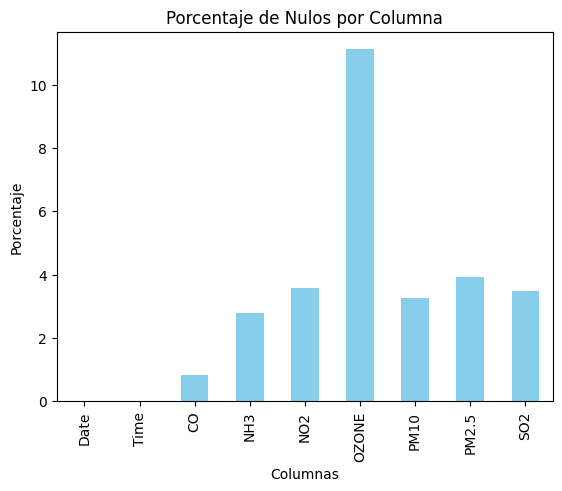

In [17]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Visualización del porcentaje de nulos
missing_percentage.plot(kind='bar', title='Porcentaje de Nulos por Columna', color='skyblue')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje')
plt.show()

Se determina que no hay pocentaje alto de nulos en ninguna columna; el valor máximo es del 11.1%, aproximadamente, en el ozono.

#8. Manejo de datos categóricos

* En este caso, se tienen como datos categóricos (como se ha verificado, son datos de tipo "Object") "Date" y "Time", por lo cual es necesario convertirlos a un dato de tipo numérico.